In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
from astroML.utils import log_multivariate_gaussian

rnd = np.random.RandomState(seed=42)

$$
y_{\rm true} = a \, x^2 + b \, x + c)
$$

In [85]:
def eval_model(a, b, c, x):
    return a*x**2 + b*x + c

In [86]:
N = 16

x = np.linspace(-5, 5, N)
true_y = eval_model(a=rnd.uniform(0, 0.5),
                    b=rnd.uniform(0, 1),
                    c=rnd.uniform(2, 3),
                    x=x)

y_err = rnd.uniform(0.1, 0.2, size=N)
y = rnd.normal(true_y, y_err)

<ErrorbarContainer object of 3 artists>

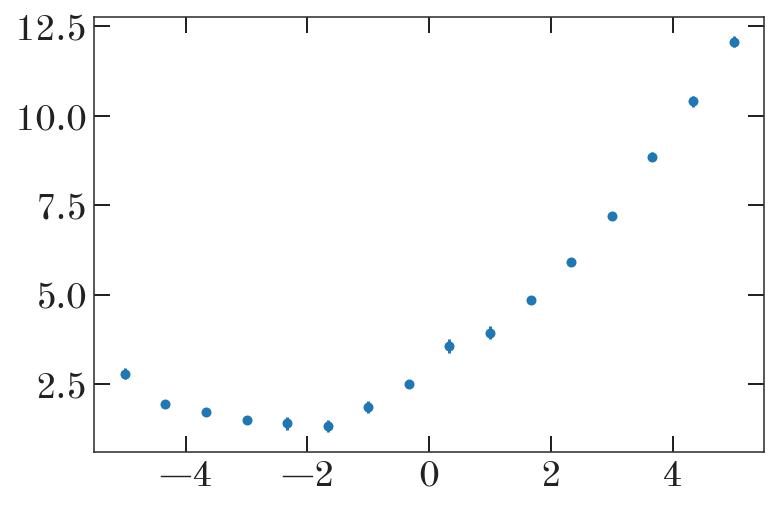

In [87]:
plt.errorbar(x, y, y_err, 
             marker='o', ls='none')

In [88]:
M = np.vander(x, N=3)

In [89]:
C = np.diag(y_err ** 2)
mu = np.array([0, 1, 1])
L = np.diag([1, 1, 5]) ** 2

In [90]:
def get_aAbB(y, C, M, mu, L):
    Linv = np.linalg.inv(L)
    Cinv = np.linalg.inv(C)

    b = M @ mu
    B = C + M @ L @ M.T

    Ainv = Linv + M.T @ Cinv @ M
    A = np.linalg.inv(Ainv)
    Binv = Cinv - Cinv @ M @ A @ M.T @ Cinv
    
    res = dict()
    res['lnlike'] = log_multivariate_gaussian(y, b, B, Vinv=Binv)
    res['a'] = np.linalg.solve(Ainv, Linv @ mu + M.T @ Cinv @ y)
    res['A'] = A
    res['b'] = b
    res['B'] = B

    return res

In [91]:
def sample(x, y, C, mu, L, M, size=1):
    res = get_aAbB(y, C, M, mu, L)
    linear_sample = np.random.multivariate_normal(res['a'], res['A'], size=size)
    return linear_sample

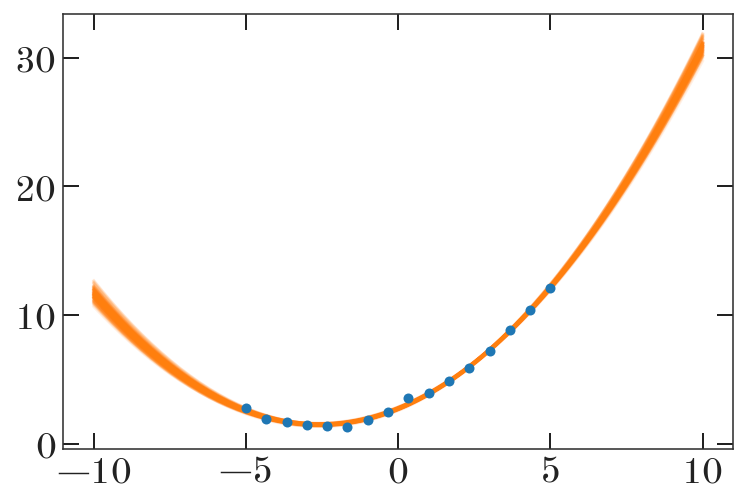

In [92]:
plt.errorbar(x, y, y_err, 
             marker='o', ls='none')

grid_x = np.linspace(-10, 10, 128)

samples = sample(x, y, C, mu, L, M, size=128)
for i in range(samples.shape[0]):
    plt.plot(grid_x, eval_model(*samples[i], x=grid_x),
             marker='', alpha=0.1, color='tab:orange')